# Visualizing Satellite Imagery with matplotlib

In [1]:
import rasterio
from matplotlib import pyplot as plt

# This notebook explores a single 4 band (blue, green, red, NIR) PlanetScope scene in a UTM projection.
# For the sake of efficiency, here we will use the clipped geoTIFF created previously
image_file = "clipped.tif"

# Use Rasterio to open the image.
satdat = rasterio.open(image_file)

In [2]:
# scale values for display purposes
def scale(band):
    return band / 10000.0

# Load the bands into numpy arrays
# recall that we previously learned PlanetScope band order is BGRN
blue = scale(satdat.read(1))
green = scale(satdat.read(2))
red = scale(satdat.read(3))
nir = scale(satdat.read(4))

In [3]:
# Use numpy to create two stacks of bands:
import numpy
rgb = numpy.dstack((red, green, blue))
nrg = numpy.dstack((nir, red, green))

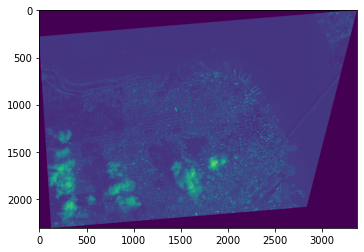

In [4]:
# Use imshow to load the blue band.
fig = plt.imshow(blue)

# Display the results.
plt.show()

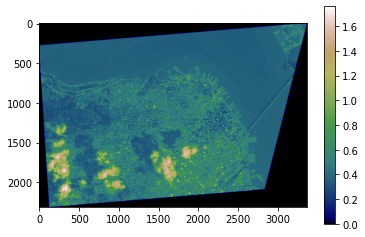

In [5]:
# Plot the green band using a non-default color ramp & a color bar
# see also: https://matplotlib.org/users/colormaps.html
fig = plt.imshow(green)
fig.set_cmap('gist_earth')
plt.colorbar()

# Display the results.
plt.show()

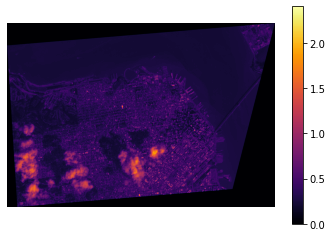

In [6]:
# Plot the red band

fig = plt.imshow(red)
fig.set_cmap('inferno')
plt.colorbar()

# Since the axis labels are useless here, let's turn them off.
plt.axis('off')

# Display the results.
plt.show()

## Displaying Composite Imagery

In [7]:
# Use numpy to create two stacks of bands:
import numpy
rgb = numpy.dstack((red, green, blue))
nrg = numpy.dstack((nir,red,green))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


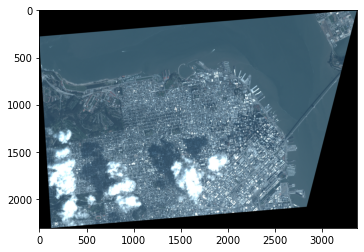

In [8]:
# plot the RGB stack to see a true-color representation
plt.imshow(rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


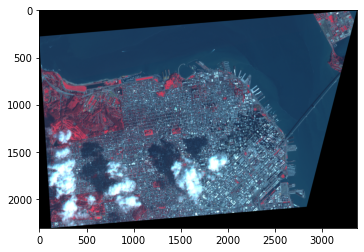

In [9]:
# use the NRG stack to display a false-color composite, highlighting vegetation
# in clipped.tif, the grassy Presidio and Golden Gate Park become easy to spot
plt.imshow(nrg)